# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1220]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [1221]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [1222]:
websites.head(5)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [1223]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [1224]:
websites['CHARSET'].value_counts()
websites['Type'].value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [1225]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [1226]:
websites.describe().T

,count,mean,std,min,25%,50%,75%,max
URL_LENGTH,1781.0,56.961258,27.555586,16.0,39.0,49.0,68.0,249.0
NUMBER_SPECIAL_CHARACTERS,1781.0,11.111735,4.549896,5.0,8.0,10.0,13.0,43.0
CONTENT_LENGTH,969.0,11726.927761,36391.809051,0.0,324.0,1853.0,11323.0,649263.0
TCP_CONVERSATION_EXCHANGE,1781.0,16.261089,40.500975,0.0,0.0,7.0,22.0,1194.0
DIST_REMOTE_TCP_PORT,1781.0,5.472768,21.807327,0.0,0.0,0.0,5.0,708.0
REMOTE_IPS,1781.0,3.060640,3.386975,0.0,0.0,2.0,5.0,17.0
APP_BYTES,1781.0,2982.339135,56050.574748,0.0,0.0,672.0,2328.0,2362906.0
SOURCE_APP_PACKETS,1781.0,18.540146,41.627173,0.0,0.0,8.0,26.0,1198.0
REMOTE_APP_PACKETS,1781.0,18.746210,46.397969,0.0,0.0,9.0,25.0,1284.0
SOURCE_APP_BYTES,1781.0,15892.545761,69861.929888,0.0,0.0,579.0,9806.0,2060012.0


In [1227]:
websites.groupby('Type')['WHOIS_COUNTRY'].value_counts()

Type  WHOIS_COUNTRY
0     US               1054
      CA                 82
      AU                 35
      PA                 19
      GB                 15
                       ... 
1     UG                  1
      IN                  1
      FR                  1
      DE                  1
      us                  1
Name: count, Length: 61, dtype: int64

In [1228]:
# Your comment here
# The dataset includes 21 columns and 1780 raws. It includes website names and tehcnical and general properties of the websites.
# The data types are: object, int64, float64
# URL_LENGTH, TCP_CONVERSATION_EXCHANGE, DIST_REMOTE_TCP_PORT, REMOTE_IPS, APP_BYTES, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_BYTES,
# REMOTE_APP_BYTES, APP_PACKETS, DNS_QUERY_TIMES are including websites features.
# we should predict column "Type" to understand which are malicious and which are benign.
# WHOIS_REGDATE and WHOIS_UPDATED_DATE are categorical data and we may need to convert them to ordinal numbers.

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [1229]:
numerical_websites = websites.select_dtypes(include = np.number)
#loop in dtypes!

numerical_websites.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

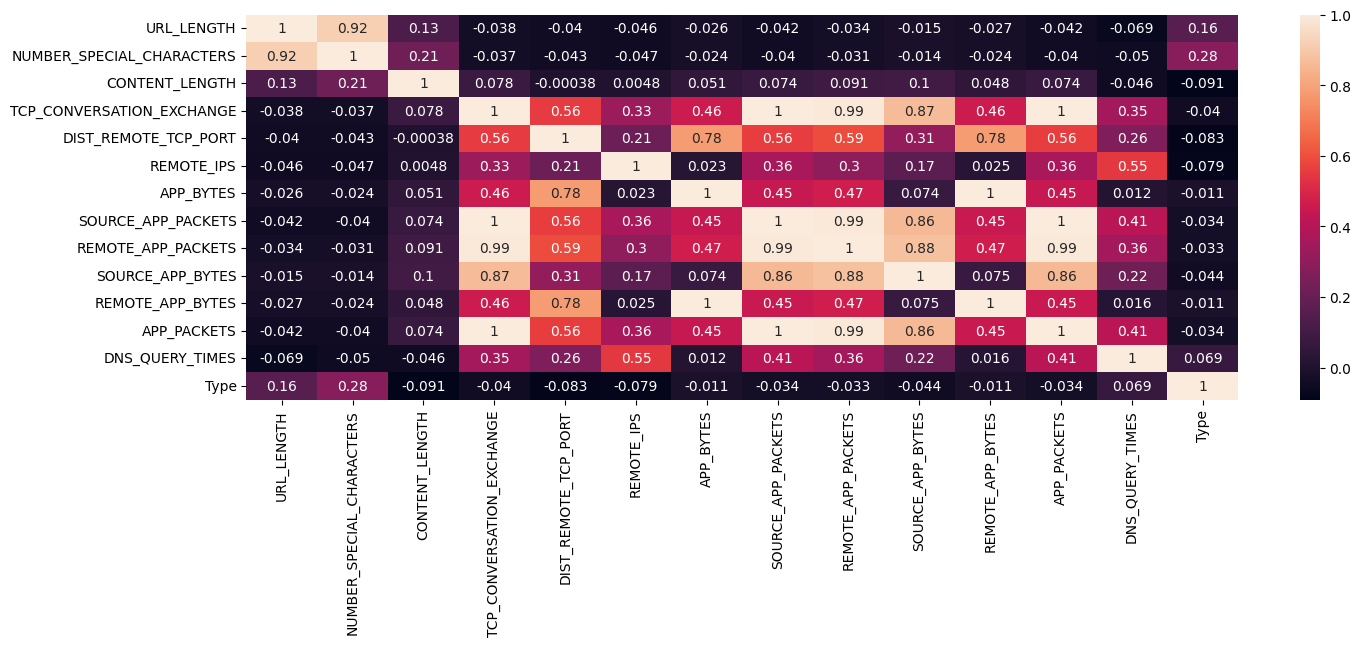

In [1230]:
corr_matrix = numerical_websites.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

In [1231]:
# Your comment here: TCP_CONVERSATION_EXCHANGE, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS might be needed to drop. 

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [1232]:
reduced_data = numerical_websites.drop(['APP_BYTES', 'REMOTE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS', 'URL_LENGTH' ],axis=1)
reduced_data.columns

Index(['NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [1233]:
websites = websites.drop(['APP_BYTES', 'REMOTE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS' ],axis=1)

In [1234]:
# Your comment here: 'APP_BYTES', 'REMOTE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS' were dropped because they had 99% -100%
# correlation between other parameters in the dataset.

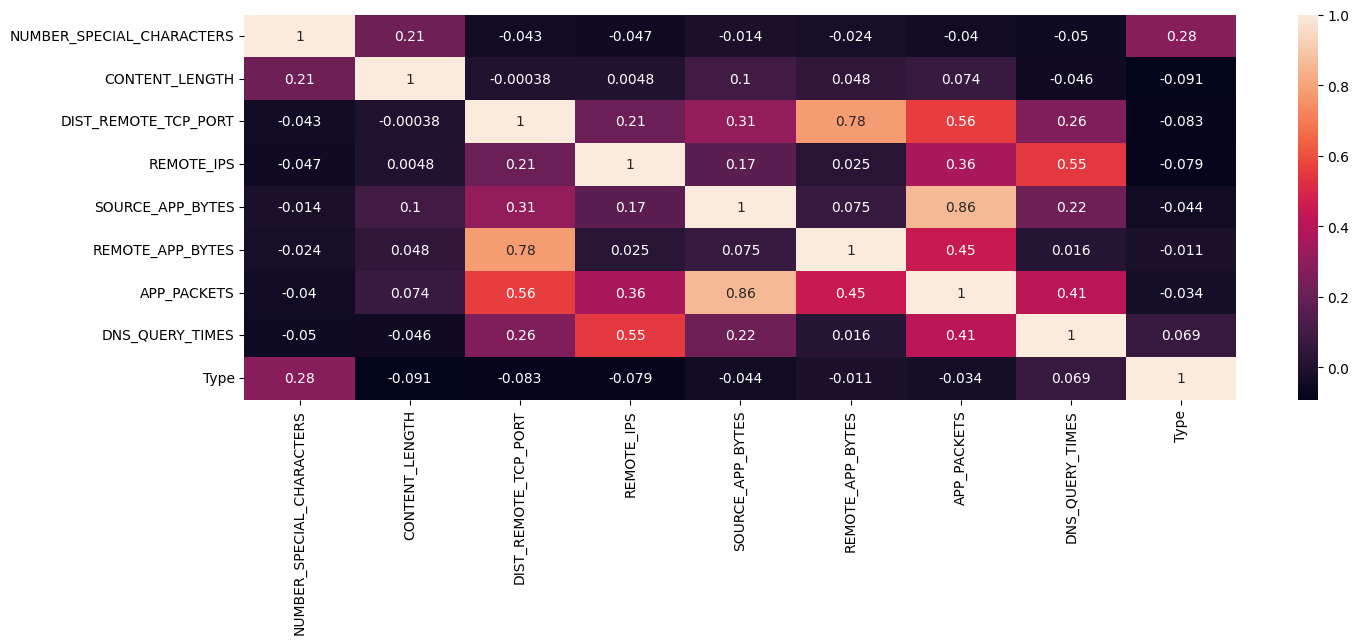

In [1235]:
corr_matrix = reduced_data.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show();


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [1236]:
reduced_data.isna().sum()

NUMBER_SPECIAL_CHARACTERS      0
CONTENT_LENGTH               812
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [1237]:
websites.drop(columns = 'CONTENT_LENGTH', inplace=True)

In [1238]:
reduced_data.dropna(axis=0, inplace=True)

In [1239]:
# CONTENT_LENGTH had 812 null data so I decided to drop the all column and there was only 1 missing value in DNS_QUERY_TIMES and 
# I deleted the raw's of missing value.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [1240]:
reduced_data.isna().sum()


NUMBER_SPECIAL_CHARACTERS    0
CONTENT_LENGTH               0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [1241]:
websites['WHOIS_COUNTRY'].unique()


array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [1242]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].fillna('NaN')


In [1243]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('Cyprus', 'CY')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('''[u'GB'; u'UK']''', 'UK')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('United Kingdom', 'UK')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('GB', 'UK')
websites['WHOIS_COUNTRY']= websites['WHOIS_COUNTRY'].apply(str.upper)
#websites['WHOIS_COUNTRY'].replace({})  IN THE MAP KEYS are the data we want to change, values the one we want to call.


In [1244]:
websites['WHOIS_COUNTRY'].unique()

array(['NAN', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

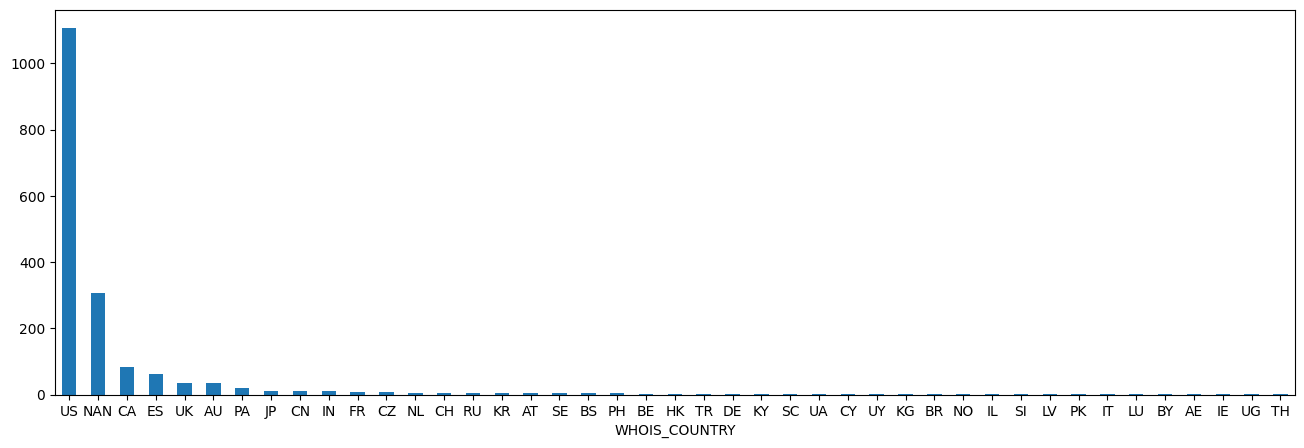

In [1245]:
plt.figure(figsize = (16,5))
ax = websites['WHOIS_COUNTRY'].value_counts().plot.bar(x='lab', y='val', rot=0)


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [1246]:
def fix_countries_name(x):
    x = str(x)
    if x == 'US':
        return 'US'
    if x == 'NAN':
        return 'NAN'
    if x == 'CA':
        return 'CA'
    if x == 'ES':
        return 'ES'
    if x == 'AU':
        return 'AU'
    if x == 'PA':
        return 'PA'
    if x == 'JP':
        return 'JP'
    if x == 'CN':
        return 'CN'
    if x == 'IN':
        return 'IN'
    return 'OTHER'

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [1247]:
websites.drop(columns = {'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'}, inplace = True)


In [1248]:
websites['WHOIS_COUNTRY']= websites['WHOIS_COUNTRY'].apply(fix_countries_name)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [1249]:
websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [1250]:
websites.drop(columns = {'URL'}, inplace = True)



#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [1251]:
websites['CHARSET'].unique()
#upper case, unitization...

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [1252]:
#websites = websites.fillna('NaN')

In [1253]:
websites.dropna(axis=0, inplace=True)

In [1254]:
websites['SERVER'].value_counts()


SERVER
Apache                                                                             385
nginx                                                                              211
Microsoft-HTTPAPI/2.0                                                              113
cloudflare-nginx                                                                    94
Microsoft-IIS/7.5                                                                   51
                                                                                  ... 
Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
CherryPy/3.6.0                                                                       1
mw2241.codfw.wmnet                                                                   1
Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8                      1
Apache/2.2.16 (Debian)                                                               1
Name: count, Length: 236, dtype: int

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [1255]:
def server_names(x):
    #output = x
    if 'Apache' in x:
        return 'Apache'
    if 'Microsoft' in x:
        return 'Microsoft'
    if 'nginx' in x:
        return 'nginx'
    return'Other'

In [1256]:
websites['SERVER'] = websites['SERVER'].apply(server_names)

In [1257]:
websites['SERVER'].value_counts()


SERVER
Apache       640
nginx        435
Other        327
Microsoft    196
Name: count, dtype: int64

In [1258]:
websites.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [1259]:
websites.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [1260]:
website_dummy= pd.get_dummies(websites, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'])
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859,...,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_NAN,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
0,16,7,0,2,1153,832,9,2.0,1,False,...,False,False,False,False,False,False,True,False,False,False
1,16,6,7,4,1265,1230,17,0.0,0,False,...,False,False,False,False,False,False,True,False,False,False
2,16,6,0,0,0,0,0,0.0,0,False,...,False,False,False,False,False,False,True,False,False,False
3,17,6,22,3,18784,4380,39,8.0,0,False,...,False,False,False,False,False,False,False,False,False,True
5,18,7,6,9,838,894,11,0.0,0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,186,0,0,0.0,1,False,...,False,False,False,True,False,False,False,False,False,False
1777,198,17,0,0,124,0,0,0.0,1,False,...,False,False,False,True,False,False,False,False,False,False
1778,201,34,2,6,132181,6945,87,4.0,0,False,...,False,False,False,False,False,False,False,False,False,True
1779,234,34,0,0,0,0,0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [1261]:
website_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859                bool
CHARSET_ISO-8859-1              bool
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
CHARSET_windows-1252            bool
SERVER_Apache                   bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CN                bool
WHOIS_COUNTRY_ES                bool
WHOIS_COUNTRY_IN                bool
WHOIS_COUNTRY_JP                bool
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [1262]:
from sklearn.model_selection import train_test_split
Y=website_dummy['Type']
X= website_dummy.drop(['Type'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [1290]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier


In [1264]:
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859,...,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_NAN,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
0,16,7,0,2,1153,832,9,2.0,1,False,...,False,False,False,False,False,False,True,False,False,False
1,16,6,7,4,1265,1230,17,0.0,0,False,...,False,False,False,False,False,False,True,False,False,False
2,16,6,0,0,0,0,0,0.0,0,False,...,False,False,False,False,False,False,True,False,False,False
3,17,6,22,3,18784,4380,39,8.0,0,False,...,False,False,False,False,False,False,False,False,False,True
5,18,7,6,9,838,894,11,0.0,0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,186,0,0,0.0,1,False,...,False,False,False,True,False,False,False,False,False,False
1777,198,17,0,0,124,0,0,0.0,1,False,...,False,False,False,True,False,False,False,False,False,False
1778,201,34,2,6,132181,6945,87,4.0,0,False,...,False,False,False,False,False,False,False,False,False,True
1779,234,34,0,0,0,0,0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,True


In [1265]:
#scaler= StandardScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.fit_transform(X_test)
model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [1266]:
model.fit(X_train, Y_train)



/Users/basakbuluttekin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [1267]:
Y_train.shape

(1278,)

In [1268]:
y_pred = model.predict(X_train)
print(confusion_matrix(Y_train, y_pred))
print(accuracy_score(Y_train, y_pred))



[[1082   25]
 [ 113   58]]
0.892018779342723


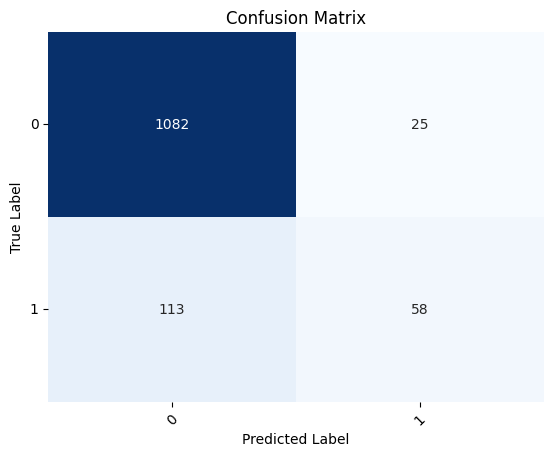

In [1269]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_train, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [1270]:
precision = precision_score(Y_train,y_pred)
recall = recall_score(Y_train, y_pred)
accuracy= (accuracy_score(Y_train, y_pred))
print("precision: ",precision)
print("recall: ",recall)
print("accuracy: ",accuracy)

precision:  0.6987951807228916
recall:  0.3391812865497076
accuracy:  0.892018779342723


What are your thoughts on the performance of the model? Write your conclusions below.

In [1271]:
# Accuracy of prediction is 89% so it is not good enough but can be used.
# Based on the confusion matrix results, it is better to use the model for capturing accuracy because recall and precision results are not good enough.
# There are many false negatives and it can be costly to use it for recall.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [1272]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred= knn.predict(X_test)



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

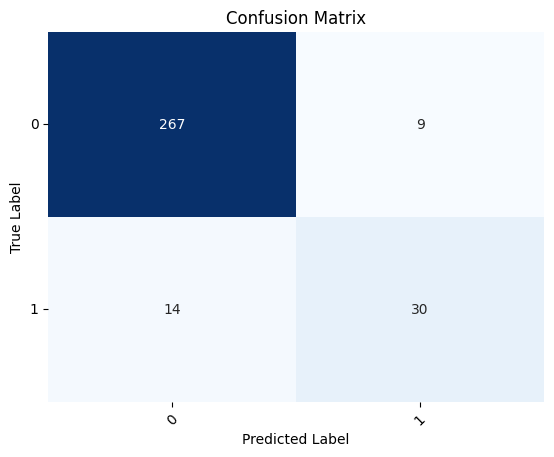

In [1273]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()



In [1279]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
accuracy= (accuracy_score(Y_test, y_pred))
print("precision: ",precision)
print("recall: ",recall)
print("accuracy: ",accuracy)


precision:  0.8055555555555556
recall:  0.6590909090909091
accuracy:  0.93125


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

precision:  0.8055555555555556
recall:  0.6590909090909091
accuracy:  0.93125


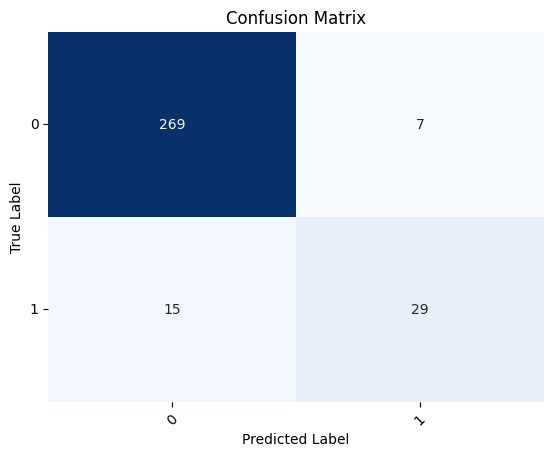

In [1280]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred= knn.predict(X_test)

precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
accuracy= (accuracy_score(Y_test, y_pred))
print("precision: ",precision)
print("recall: ",recall)
print("accuracy: ",accuracy)


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [1281]:
# Your conclusions here:accuracy score is better twhen we are using 5 for k value.
# Increasing number of neighbors is helpful to increase accuracy in this case. 



#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

In [1289]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)
y_pred = model1.predict(X_test)

precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
accuracy= (accuracy_score(Y_test, y_pred))
print("precision: ",precision)
print("recall: ",recall)
print("accuracy: ",accuracy)


precision:  0.7291666666666666
recall:  0.7954545454545454
accuracy:  0.93125


In [1291]:
model2= RandomForestClassifier()
model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)

precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
accuracy= (accuracy_score(Y_test, y_pred))
print("precision: ",precision)
print("recall: ",recall)
print("accuracy: ",accuracy)


precision:  0.9459459459459459
recall:  0.7954545454545454
accuracy:  0.965625


In [1293]:
from sklearn.svm import SVC

model3= SVC()
model3.fit(X_train, Y_train)
y_pred = model3.predict(X_test)

accuracy= (accuracy_score(Y_test, y_pred))
print("accuracy: ",accuracy)


accuracy:  0.8625


In [ ]:
# RandomForestClassifier is the most proper model to use in this case because it is giving the highest accuracy ratio.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [1277]:
# Your code here